<a href="https://colab.research.google.com/github/AvivGelfand/Driver-Behavior-Detection-Using-Smartphone-Signals/blob/main/Drivers_Behavior_Detection_with_Smartphone_Signal_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

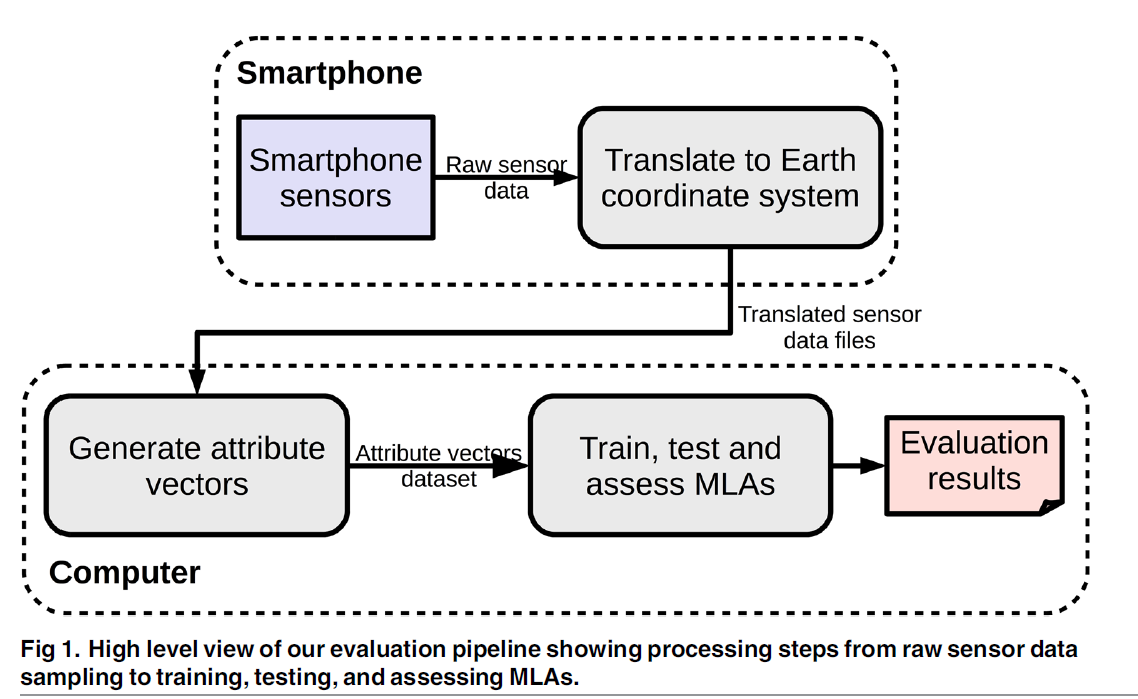

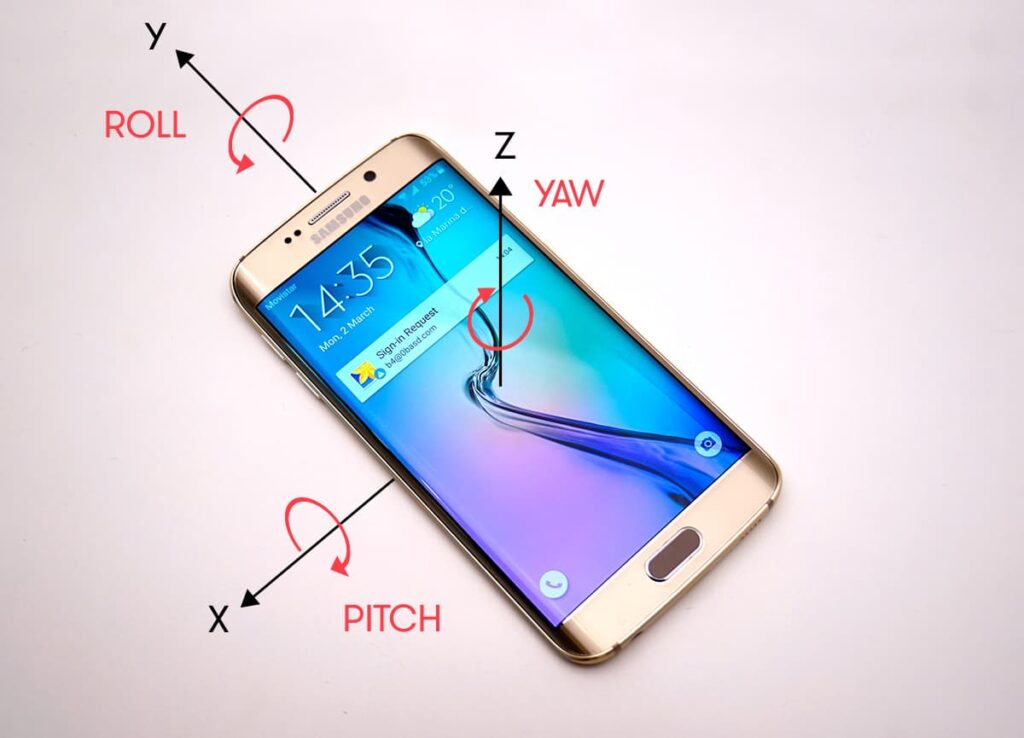

# Loading Data

Source:
- https://data.mendeley.com/datasets/5stn873wft/1
- S. Nazirkar, “Phone sensor data while driving a car and normal or aggressive driving behaviour classification”. Mendeley, 2021. doi: 10.17632/5STN873WFT.1.

Data has been recorded on an android phone attached to the dashboard of the car. Data was collected while driving the car on city roads in mild traffic.
The parameters recorded are:
- Longitude
- Latitude
- Speed
- Distance
- Time
- Accelerometer X
- Accelerometer Y
- Accelerometer Z
- Heading
- Gyroscope X
- Gyroscope Y
- Gyroscope Z

Sampling Rate: Average 2 samples (rows) per second

Driver Behaviors:
    1. Normal driving (Class Label: 0)
    2. Aggressive driving (Class Label: 1)

In [ ]:
import pandas as pd
path1 = 'https://raw.githubusercontent.com/AvivGelfand/Driver-Behavior-Detection-Using-Smartphone-Signals/main/data/nazirkar_2021_dataset/1_20210317_184512.csv'
path2= 'https://raw.githubusercontent.com/AvivGelfand/Driver-Behavior-Detection-Using-Smartphone-Signals/main/data/nazirkar_2021_dataset/2_20210317_171452.csv'
path3= 'https://raw.githubusercontent.com/AvivGelfand/Driver-Behavior-Detection-Using-Smartphone-Signals/main/data/nazirkar_2021_dataset/3_FinalDatasetCsv.csv'
df1=pd.read_csv(path1)
df1['data_set'] = 1
# df1.info()
df2=pd.read_csv(path2)
# df2.info()
df2['data_set'] = 2
df3=pd.read_csv(path3)
# df3.info()
df3['data_set'] = 3

df_combined = pd.concat([df2,df1])
df_combined.info()
df_combined.head()


<class 'pandas.core.frame.DataFrame'>
Index: 14249 entries, 0 to 6645
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  14249 non-null  float64
 1   Latitude   14249 non-null  float64
 2   Speed      14249 non-null  float64
 3   Distance   14249 non-null  float64
 4   Time       14249 non-null  object 
 5   Acc X      14249 non-null  float64
 6   Acc Y      14249 non-null  float64
 7   Acc Z      14249 non-null  float64
 8   Heading    14249 non-null  float64
 9   gyro_x     14249 non-null  float64
 10  gyro_y     14249 non-null  float64
 11  gyro_z     14249 non-null  float64
 12  data_set   14249 non-null  int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


,Longitude,Latitude,Speed,Distance,Time,Acc X,Acc Y,Acc Z,Heading,gyro_x,gyro_y,gyro_z,data_set
0,73.831324,18.518700,1.29,8.312031e+06,17-14-53,0.046402,-0.137178,-0.282934,265.0,-0.036306,-0.008226,-0.023416,2
1,73.831324,18.518700,1.29,8.312031e+06,17-14-53,-0.136978,0.365242,0.108889,266.0,0.035776,-0.009448,0.009570,2
2,73.831324,18.518700,1.29,8.312031e+06,17-14-53,-0.045355,-0.103340,-0.534985,266.0,-0.011871,-0.027774,0.003462,2
3,73.831201,18.518714,0.31,1.302423e+01,17-14-53,0.242089,0.072761,-0.350396,266.0,-0.017980,0.002769,-0.005091,2
4,73.831201,18.518714,0.31,1.302423e+01,17-14-53,-0.230234,0.011765,-0.494085,266.0,0.011342,0.003380,0.006516,2


In [ ]:
# prompt: merge left df_combined and df3 on  matching 'Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y' ,'gyro_z'
merged_df = pd.merge(left=df_combined, right=df3, on=['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z'], how='left',
                     suffixes=('_origin', '_new'))
# prompt: using merged_df compare stats between label values 0, 1, and null
merged_df.fillna(2, inplace=True)

# change label to int type
merged_df['label'] = merged_df['label'].astype(int)
merged_df['Time'] = pd.to_datetime(merged_df['Time'], format='%H-%M-%S', errors='coerce')
# merged_df.to_csv('Nazirkar_full.csv',index=False)

merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14253 entries, 0 to 14252
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Longitude        14253 non-null  float64       
 1   Latitude         14253 non-null  float64       
 2   Speed            14253 non-null  float64       
 3   Distance         14253 non-null  float64       
 4   Time             14253 non-null  datetime64[ns]
 5   Acc X            14253 non-null  float64       
 6   Acc Y            14253 non-null  float64       
 7   Acc Z            14253 non-null  float64       
 8   Heading          14253 non-null  float64       
 9   gyro_x           14253 non-null  float64       
 10  gyro_y           14253 non-null  float64       
 11  gyro_z           14253 non-null  float64       
 12  data_set_origin  14253 non-null  int64         
 13  label            14253 non-null  int64         
 14  data_set_new     14253 non-null  float

,Longitude,Latitude,Speed,Distance,Time,Acc X,Acc Y,Acc Z,Heading,gyro_x,gyro_y,gyro_z,data_set_origin,label,data_set_new
0,73.831324,18.518700,1.29,8.312031e+06,1900-01-01 17:14:53,0.046402,-0.137178,-0.282934,265.0,-0.036306,-0.008226,-0.023416,2,0,3.0
1,73.831324,18.518700,1.29,8.312031e+06,1900-01-01 17:14:53,-0.136978,0.365242,0.108889,266.0,0.035776,-0.009448,0.009570,2,0,3.0
2,73.831324,18.518700,1.29,8.312031e+06,1900-01-01 17:14:53,-0.045355,-0.103340,-0.534985,266.0,-0.011871,-0.027774,0.003462,2,2,2.0
3,73.831201,18.518714,0.31,1.302423e+01,1900-01-01 17:14:53,0.242089,0.072761,-0.350396,266.0,-0.017980,0.002769,-0.005091,2,2,2.0
4,73.831201,18.518714,0.31,1.302423e+01,1900-01-01 17:14:53,-0.230234,0.011765,-0.494085,266.0,0.011342,0.003380,0.006516,2,0,3.0


# EDA

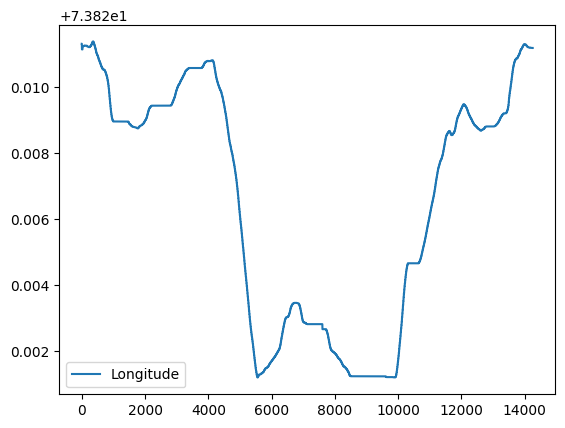

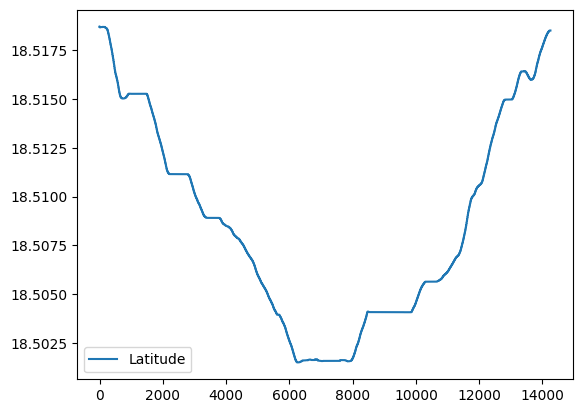

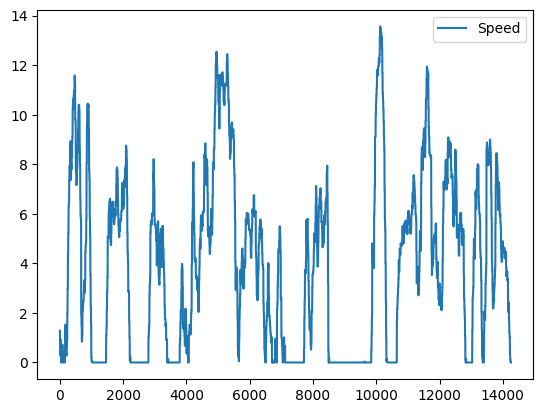

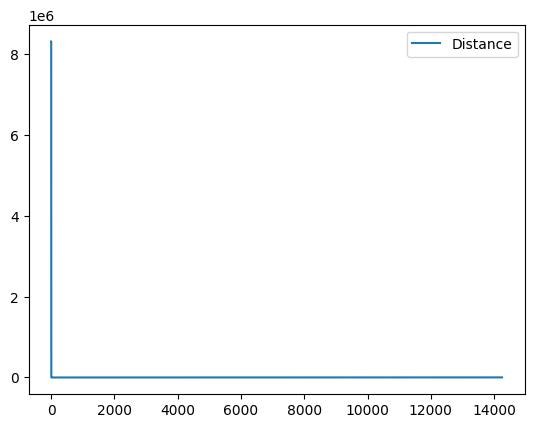

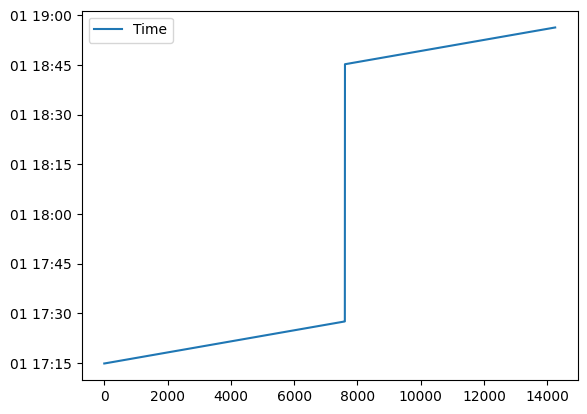

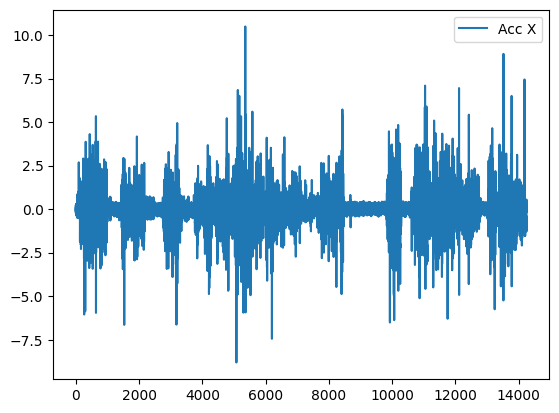

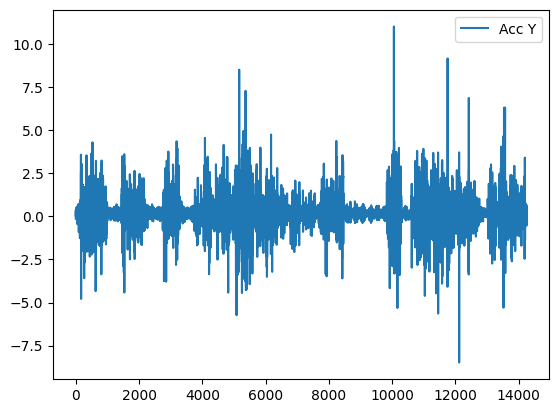

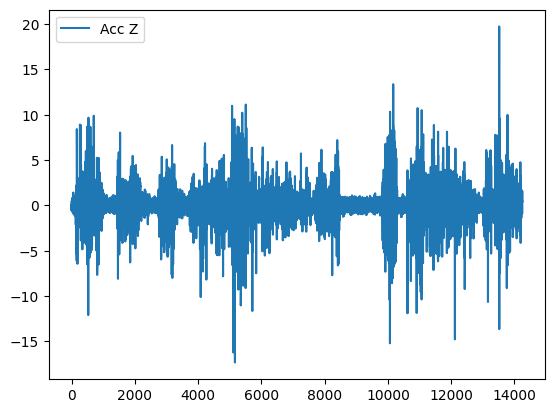

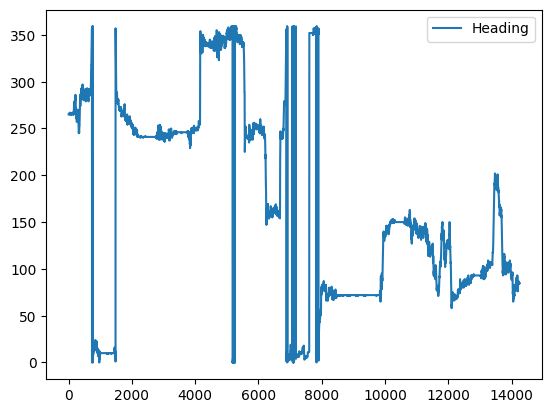

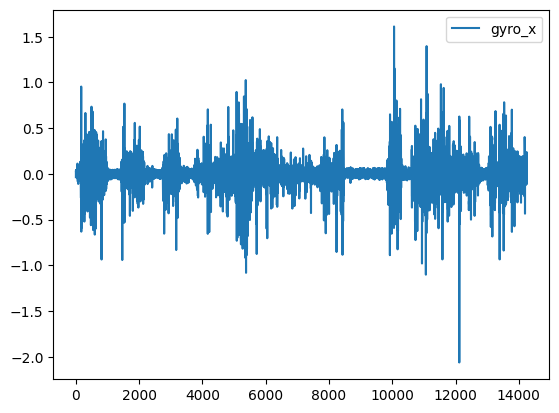

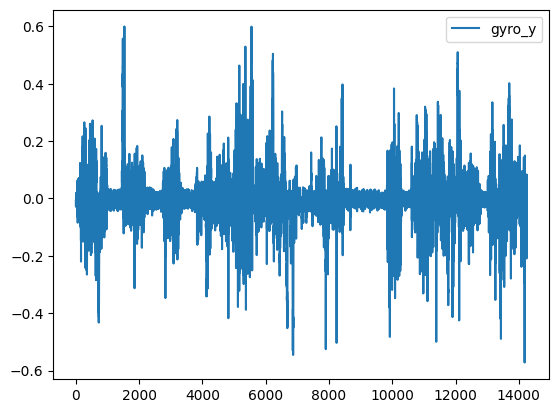

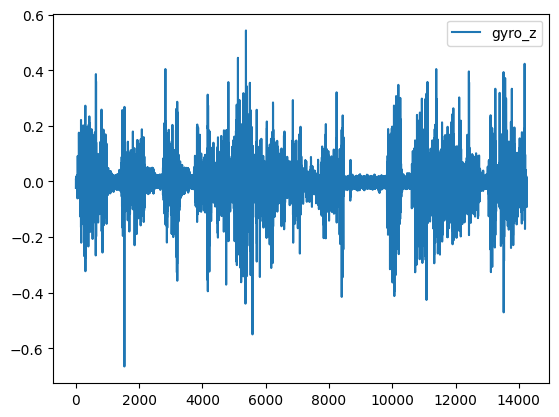

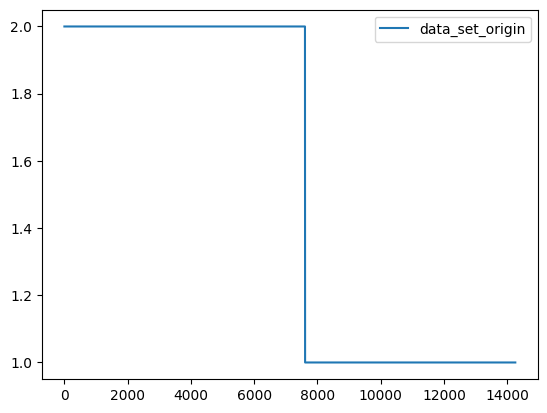

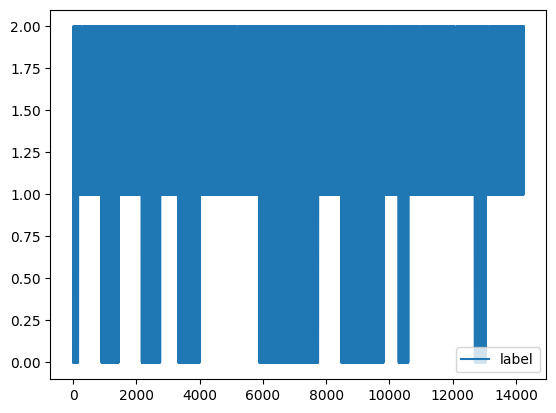

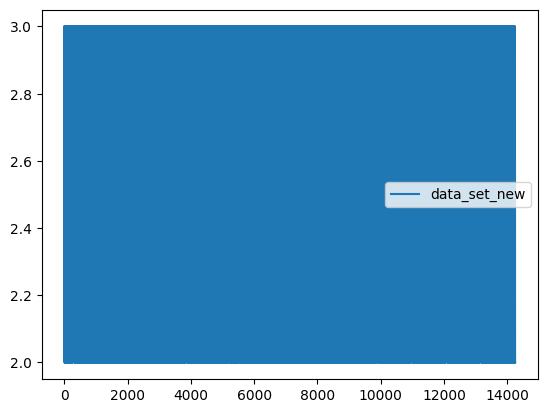

In [ ]:
# prompt: Using dataframe merged_df: plot each colunn against the index

for column in merged_df.columns:
    merged_df.plot(y=column);


In [ ]:
# Group the DataFrame by the 'label' column
grouped_df = merged_df[[ 'Time', 'Acc X', 'Acc Y','Acc Z', 'Heading', 'gyro_x', 'gyro_y', 'gyro_z', 'label']].groupby('label')

# Calculate descriptive statistics for each group
descriptive_stats = grouped_df.describe()

# Print the descriptive statistics
display(descriptive_stats.T)

label                                     0                              1  \
Time   count                           3300                           6869   
       mean   1900-01-01 17:49:04.823636224  1900-01-01 18:08:50.858931200   
       min              1900-01-01 17:14:53            1900-01-01 17:15:09   
       25%              1900-01-01 17:20:50            1900-01-01 17:21:42   
       50%              1900-01-01 17:25:56            1900-01-01 18:45:53   
...                                     ...                            ...   
gyro_z 25%                        -0.020505                      -0.053349   
       50%                        -0.003258                      -0.008898   
       75%                         0.019955                       0.044247   
       max                         0.292401                       0.542856   
       std                         0.044575                       0.089496   

label                                     2  
Time   count                           4084  
       mean   1900-01-01 18:04:21.854064640  
       min              1900-01-01 17:14:53  
       25%              1900-01-01 17:20:35  
       50%              1900-01-01 17:27:25  
...                                     ...  
gyro_z 25%                        -0.011342  
       50%                        -0.001425  
       75%                         0.007127  
       max                         0.234226  
       std                         0.032306  

[64 rows x 3 columns]

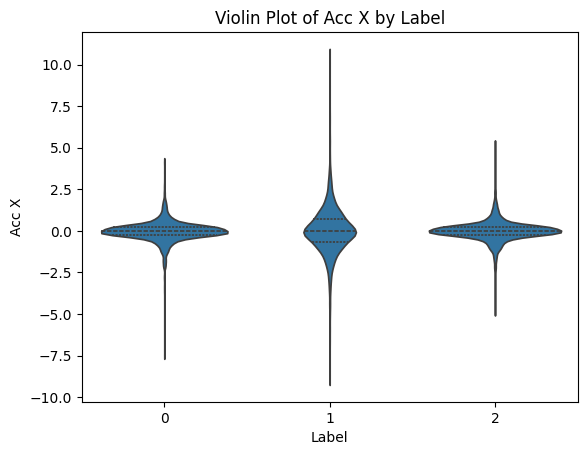

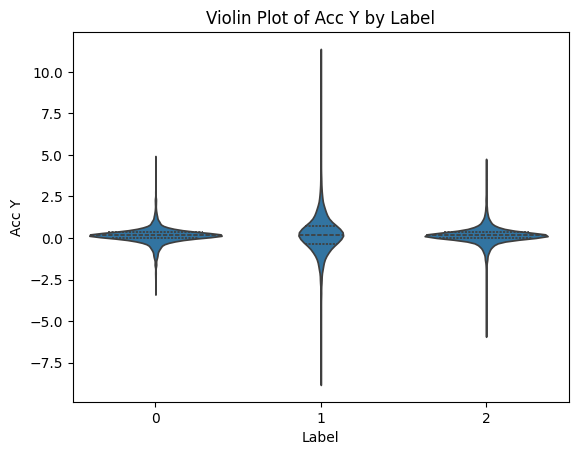

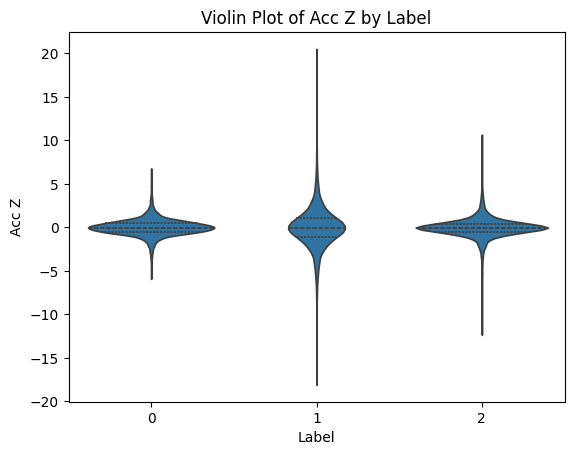

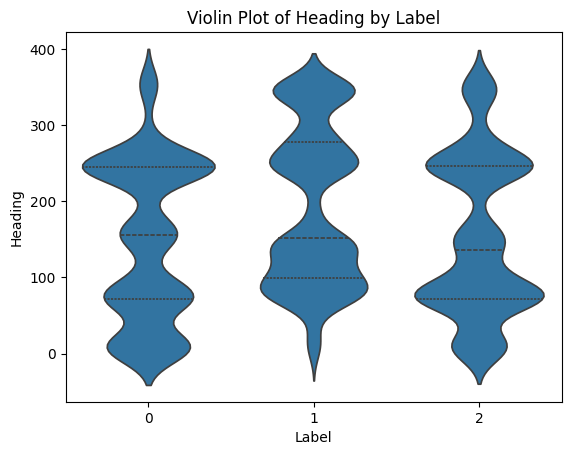

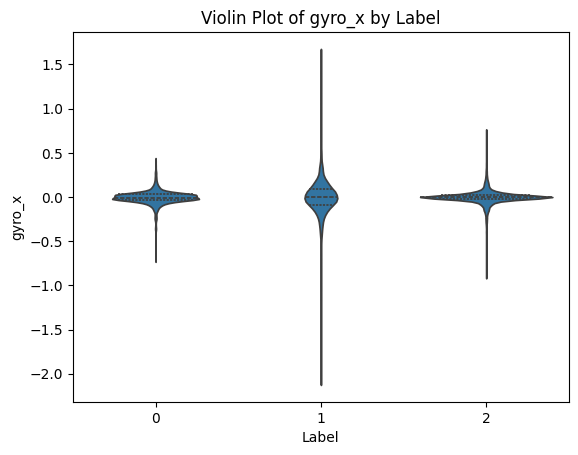

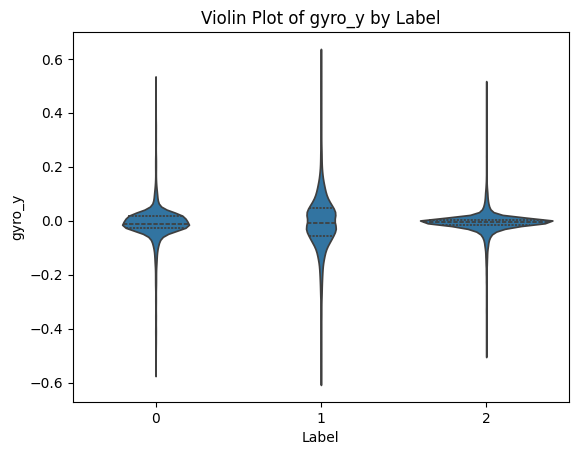

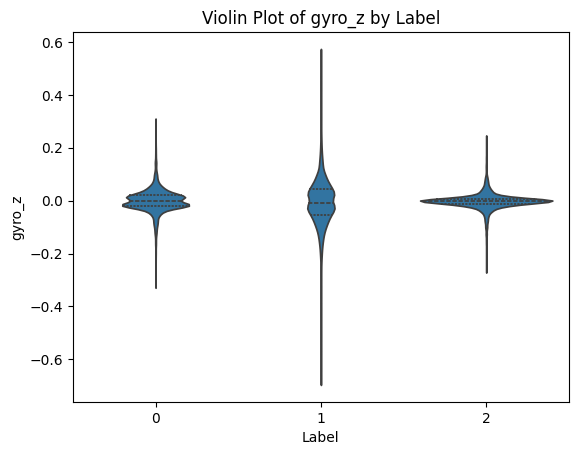

In [ ]:
# prompt: use merged_df to make violin plots by label
import matplotlib.pyplot as plt
import seaborn as sns
# Create a violin plot for each numerical column, grouped by label
for col in ['Acc X', 'Acc Y', 'Acc Z', 'Heading', 'gyro_x', 'gyro_y', 'gyro_z']:
    sns.violinplot(x='label', y=col, data=merged_df, inner='quartile')
    plt.title(f'Violin Plot of {col} by Label')
    plt.xlabel('Label')
    plt.ylabel(col)
    plt.show();

In [ ]:
# # prompt: Using dataframe df: Using dataframe df: line plot of accx,accy,accz vs index with matplotlib, fig size (12,14), line width small
# import matplotlib.pyplot as plt
# plt.figure(figsize=(12,14))
# # plt.plot(df.index, df1['accx'], linewidth=0.5, label='accx')
# # plt.plot(df.index, df['accy'], linewidth=0.5, label='accy')
# # plt.plot(df.index, df['accz'], linewidth=0.5, label='accz')
# plt.xlabel('Index')
# plt.ylabel('Acceleration')
# plt.title('Line Plot of accx, accy, accz vs Index')

In [ ]:
# # prompt: Using dataframe df: violin plot plot accx,accy,accz vs class seaborn
# import seaborn as sns
# sns.violinplot(x="class", y="accx", data=df);

In [ ]:
# sns.violinplot(x="class", y="accy", data=df);

In [ ]:
# sns.violinplot(x="class", y="accz", data=df);

# Feature Extraction

In [ ]:
tmp =  merged_df[[ 'Time', 'Acc X', 'Acc Y','Acc Z', 'Heading', 'gyro_x', 'gyro_y', 'gyro_z', 'label']].copy()
tmp = tmp[tmp['label'] !=2]
tmp['Time'] = pd.to_datetime(tmp['Time'], format='%H-%M-%S', errors='coerce')

tmp.to_csv('DrivingBehavior.csv',index=False)
tmp.info()
tmp.head()

<class 'pandas.core.frame.DataFrame'>
Index: 10169 entries, 0 to 14247
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     10169 non-null  datetime64[ns]
 1   Acc X    10169 non-null  float64       
 2   Acc Y    10169 non-null  float64       
 3   Acc Z    10169 non-null  float64       
 4   Heading  10169 non-null  float64       
 5   gyro_x   10169 non-null  float64       
 6   gyro_y   10169 non-null  float64       
 7   gyro_z   10169 non-null  float64       
 8   label    10169 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 794.5 KB


,Time,Acc X,Acc Y,Acc Z,Heading,gyro_x,gyro_y,gyro_z,label
0,1900-01-01 17:14:53,0.046402,-0.137178,-0.282934,265.0,-0.036306,-0.008226,-0.023416,0
1,1900-01-01 17:14:53,-0.136978,0.365242,0.108889,266.0,0.035776,-0.009448,0.009570,0
4,1900-01-01 17:14:53,-0.230234,0.011765,-0.494085,266.0,0.011342,0.003380,0.006516,0
12,1900-01-01 17:14:54,-0.199196,0.018982,-0.483660,266.0,0.025392,0.019873,-0.014864,0
13,1900-01-01 17:14:54,0.275682,0.278884,-0.136194,266.0,-0.006373,-0.014335,-0.008756,0


In [ ]:
from sklearn.model_selection import train_test_split

# Determine the split index
split_idx = int(len(tmp) * 0.8)  # 80% for training, 20% for testing

# Split the data into training and testing sets without shuffling
raw_train = tmp.iloc[:split_idx]
raw_test = tmp.iloc[split_idx:]



## Sliding Window for extracting features

In [ ]:
import numpy as np
import pandas as pd

def compute_rolling_mode(labels, window_size):
    # Convert labels to a DataFrame for vectorized operations
    label_df = pd.DataFrame(labels)

    # Use cumulative sum for 0s and 1s to prepare for differential counting
    cumsum = label_df.cumsum()

    # The shifted cumulative sum gives us the start of the window counts
    shifted_cumsum = cumsum.shift(window_size)

    # The counts within the window are the differences
    window_counts = cumsum - shifted_cumsum.fillna(0)  # Fill NA for the first window

    # Determine the mode (most frequent value) across the window
    # 1 if the count of 1s is greater than half the window size, 0 otherwise
    mode_series = (window_counts >= window_size / 2).astype(int)['label']
    return mode_series

def sliding_window_features_optimized(data, min_t=2, max_t=15, step=1):
    sample_rate = 1  # samples per second
    features = []
    numeric_columns = data.select_dtypes(include=[np.number])

    for t in range(min_t, max_t + 1):
        window_size = t * sample_rate
        rolling_windows = numeric_columns.rolling(window=window_size, min_periods=window_size)

        # Compute statistics for each window size
        max_values = rolling_windows.max()
        min_values = rolling_windows.min()
        std_values = rolling_windows.std()
        mean_values = rolling_windows.mean()

        # Calculate mean for first and second halves
        half_window = window_size // 2
        mu_acc_x_1 = numeric_columns['Acc X'].rolling(window=half_window, min_periods=half_window).mean()
        mu_acc_x_2 = numeric_columns['Acc X'].shift(-half_window).rolling(window=half_window, min_periods=half_window).mean()

        # Compute the mode of labels more efficiently
        label_mode = compute_rolling_mode(data['label'], window_size)

        for start in range(window_size - 1, len(data) - window_size + 1, step):
            feature_vector = {
                'time_duration': t,
                'range_acc_x': max_values['Acc X'].iloc[start] - min_values['Acc X'].iloc[start],
                'range_acc_y': max_values['Acc Y'].iloc[start] - min_values['Acc Y'].iloc[start],
                'sigma_acc_x': std_values['Acc X'].iloc[start],
                'sigma_acc_y': std_values['Acc Y'].iloc[start],
                'sigma_ori_x': std_values['gyro_x'].iloc[start],
                'sigma_ori_y': std_values['gyro_y'].iloc[start],
                'mu_acc_x': mean_values['Acc X'].iloc[start],
                'mu_acc_y': mean_values['Acc Y'].iloc[start],
                'mu_ori_x': mean_values['gyro_x'].iloc[start],
                'mu_ori_y': mean_values['gyro_y'].iloc[start],
                'mu_acc_x_1': mu_acc_x_1.iloc[start] if start < len(mu_acc_x_1) else None,
                'mu_acc_x_2': mu_acc_x_2.iloc[start] if start < len(mu_acc_x_2) else None,
                'maxori_x': max_values['gyro_x'].iloc[start],
                'maxori_y': max_values['gyro_y'].iloc[start],
                'minacc_y': min_values['Acc Y'].iloc[start],
                'label': label_mode.iloc[start] if start < len(label_mode) else None,
            }
            features.append(feature_vector)

    return pd.DataFrame(features)

# Example of how to use the function
# df_processed = sliding_window_features_optimized(tmp)
# df_processed

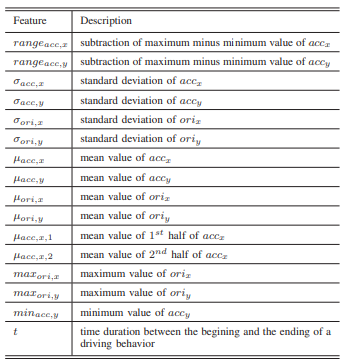

In [ ]:
# Then, perform feature extraction on each set separately
train_processed = sliding_window_features_optimized(raw_train, min_t=2, max_t=15, step=1)
test_processed = sliding_window_features_optimized(raw_test, min_t=2, max_t=15, step=1)

# Extract features and labels
X_train = train_processed.drop('label', axis=1)
y_train = train_processed['label']
X_test = test_processed.drop('label', axis=1)
y_test = test_processed['label']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM classifier
svm_classifier = SVC(kernel='rbf')  # You can adjust the parameters as needed
svm_classifier.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8730984221325975
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.84      0.56      2709
           1       0.98      0.88      0.93     25557

    accuracy                           0.87     28266
   macro avg       0.70      0.86      0.74     28266
weighted avg       0.93      0.87      0.89     28266



In [ ]:
from sklearn.neural_network import MLPClassifier

mlpc=MLPClassifier()
mlpc.fit(X_train,y_train)
y_pred=mlpc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8458925918064105
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.80      0.50      2709
           1       0.98      0.85      0.91     25557

    accuracy                           0.85     28266
   macro avg       0.67      0.82      0.70     28266
weighted avg       0.92      0.85      0.87     28266



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



# Step 1: Loading and Understanding the Sensor Data
- **Accelerometer**: Measures acceleration including gravity. Once gravitational acceleration is removed, the remaining signal can indicate tilt relative to gravity when the device is not undergoing linear motion.
- **Gyroscope**: Measures the rate of rotation around each axis in degrees per second.
- **timestamp**:
- **label**:


In [ ]:
# general libraries
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid", rc={ 'figure.figsize': (11, 8)})


In [ ]:

train_path = 'https://raw.githubusercontent.com/AvivGelfand/Driver-Behavior-Detection-Using-Smartphone-Signals/main/data/Driving%20Behavior%20Kaggle%20Data%20Set/train_motion_data.csv'
train_raw = pd.read_csv(train_path)
favorite_col_names = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z', 'label','timestamp']
train_raw.columns = favorite_col_names
train_raw.info()
train_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   acc_x      3644 non-null   float64
 1   acc_y      3644 non-null   float64
 2   acc_z      3644 non-null   float64
 3   gyro_x     3644 non-null   float64
 4   gyro_y     3644 non-null   float64
 5   gyro_z     3644 non-null   float64
 6   label      3644 non-null   object 
 7   timestamp  3644 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 227.9+ KB


,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label,timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631


In [ ]:
train_raw[['timestamp']].describe()

,timestamp
count,3.644000e+03
mean,3.582707e+06
std,6.421479e+02
min,3.581629e+06
25%,3.582121e+06
50%,3.582702e+06
75%,3.583270e+06
max,3.583791e+06


<Axes: >

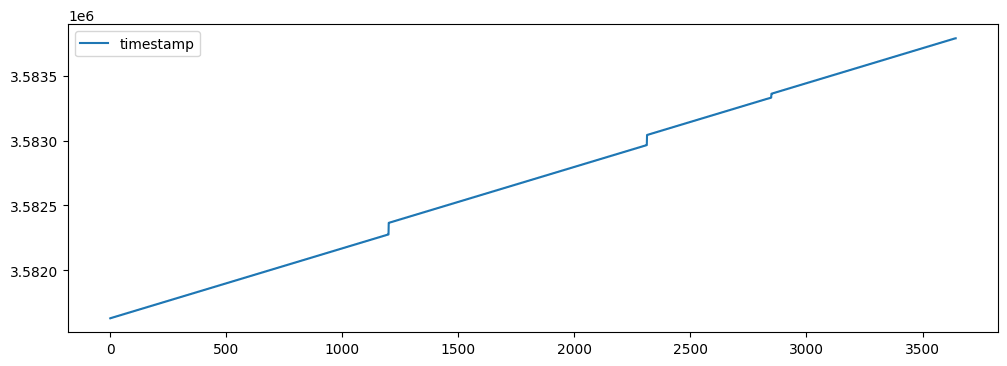

In [ ]:
train_raw[['timestamp']].plot(figsize=(12, 4))


<ipython-input-12-f6a5607d738e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(train_raw, x='acc_x', y='label', inner='box', palette='Dark2')


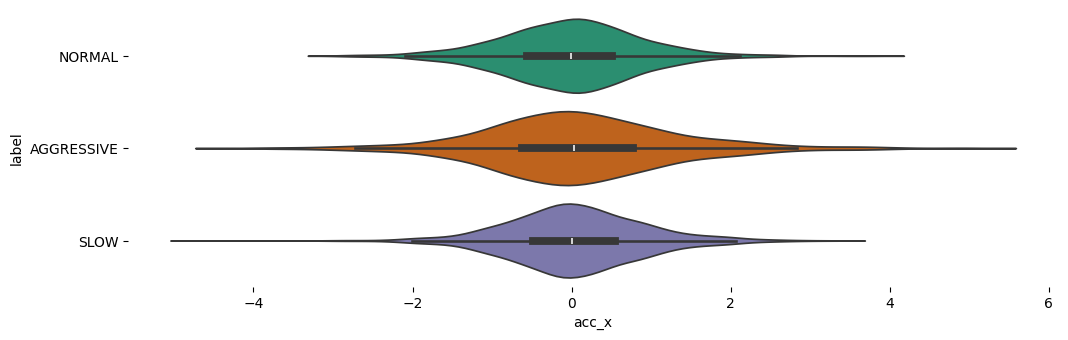

In [ ]:
# @title label vs acc_x

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(train_raw['label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(train_raw, x='acc_x', y='label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-11-3e88746a9f52>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(train_raw, x='acc_z', y='label', inner='box', palette='Dark2')


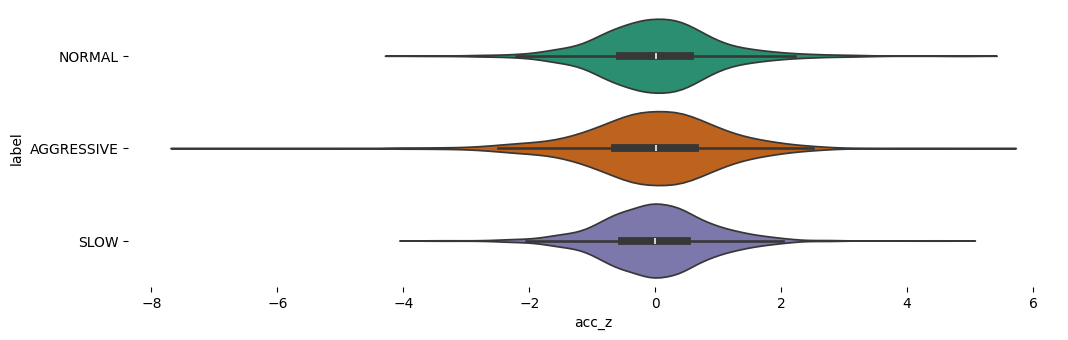

In [ ]:
# @title label vs acc_z

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(train_raw['label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(train_raw, x='acc_z', y='label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)


# Step 2: Setting up the Environment
Let's assume you have a pandas DataFrame called `data` with columns `accel_x`, `accel_y`, `accel_z`, `gyro_x`, `gyro_y`, `gyro_z`, `label`, and `timestamp`. First, you'll need to convert gyroscope data from degrees per second to radians per second because mathematical functions in most programming environments use radians.


![Demonstration of roll, pitch and azimuth](https://github.com/AvivGelfand/Driver-Behavior-Detection-Using-Smartphone-Signals/blob/main/visuals/Demonstration-of-roll-pitch-and-azimuth.png?raw=true)


Source:
GOPA: Geometrical Optics Positioning Algorithm Using Spatial Color Coded LEDs (Extended Version) - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/Demonstration-of-roll-pitch-and-azimuth_fig1_326476858 [accessed 28 Apr, 2024]




## Feature Extraction
To approximate the orientation of a mobile device using accelerometer and gyroscope data, one common method is to use [sensor fusion techniques](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9824767/). These often involve the use of complementary filters or more sophisticated approaches like Kalman filters, which blend the accelerometer and gyroscope readings to estimate the device's orientation with respect to gravity (pitch and roll angles). Here, I'll provide a simplified version using a complementary filter because it's relatively straightforward to implement.


In [ ]:
import pandas as pd
import numpy as np
data = train_raw
# Example DataFrame setup (to be replaced with actual data loading)
# data = pd.read_csv('your_dataset.csv')

# Convert gyroscope data from degrees to radians
data['gyro_x'] *= np.pi / 180
data['gyro_y'] *= np.pi / 180
data['gyro_z'] *= np.pi / 180



**Pitch**: This is the angle that represents rotation around the lateral or y-axis. Imagine tilting your head up and down — that's similar to the pitch motion. In terms of a smartphone, it indicates how much the top or bottom of the device is tilted towards or away from you.

The pitch angle is calculated using the \(y\)-axis and \(z\)-axis accelerometer readings:
$\text{pitch} = \arctan\left(\frac{accel\_y}{\sqrt{accel\_x^2 + accel\_z^2}}\right)$

**Roll**: This is the angle around the longitudinal or x-axis. Think of it as tilting your head toward your shoulders. For a smartphone, it describes how much the device is tilted side-to-side.

The roll angle is calculated using the \(x\)-axis and \(z\)-axis accelerometer readings:
$\text{roll} = \arctan\left(\frac{-accel\_x}{\sqrt{accel\_y^2 + accel\_z^2}}\right)$



### Complementary Filter
The complementary filter combines the gyroscope data (integrated over time to get an angle) and the accelerometer data (to correct the drift in gyroscope data) for both pitch and roll. Here's the general formula used:


$$\text{angle} = \alpha (\text{angle}_{\text{prev}} + \text{gyro_data} \times \text{dt}) + (1 - \alpha) \times \text{acceleration} $$

Where:
- $\text{angle}_{prev}$ is the angle estimated in the previous time step.
- $gyro$ is the gyroscope reading for the respective axis.
- $dt$ is the time interval between readings.
- `$acceleration$ is the angle calculated from accelerometer data.
- $\alpha$ is a constant that determines the balance between the gyroscope and accelerometer readings, often set around 0.98.




In [ ]:
print(data.shape)
# Initialize columns for estimated angles
data['pitch'] = 0
data['roll'] = 0

# Time step (delta t)
dt = 0.5  # since the sampling rate is 2 samples per second

# Filter constant
alpha = 0.98

for i in range(1, len(data)):
    # Gyroscope integration to estimate angles
    data.loc[i, 'pitch'] = data.loc[i-1, 'pitch'] + data.loc[i, 'gyro_x'] * dt
    data.loc[i, 'roll'] = data.loc[i-1, 'roll'] + data.loc[i, 'gyro_y'] * dt

    # Accelerometer readings to correct drift
    accel_pitch = np.arctan2(data.loc[i, 'acc_y'], data.loc[i, 'acc_z'])
    accel_roll = np.arctan2(-data.loc[i, 'acc_x'], np.sqrt(data.loc[i, 'acc_y']**2 +
                                                           data.loc[i, 'acc_z']**2))

    # Complementary filter to blend the outputs
    data.loc[i, 'pitch'] = alpha * data.loc[i, 'pitch'] + (1 - alpha) * accel_pitch
    data.loc[i, 'roll'] = alpha * data.loc[i, 'roll'] + (1 - alpha) * accel_roll

print(data.shape)


(3644, 10)
(3644, 10)


In [ ]:
data['label'] = data['label'].replace({'SLOW'       : -1,
                                       'NORMAL'     : 0,
                                       'AGGRESSIVE' : 1})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   acc_x      3644 non-null   float64
 1   acc_y      3644 non-null   float64
 2   acc_z      3644 non-null   float64
 3   gyro_x     3644 non-null   float64
 4   gyro_y     3644 non-null   float64
 5   gyro_z     3644 non-null   float64
 6   label      3644 non-null   int64  
 7   timestamp  3644 non-null   int64  
 8   pitch      3644 non-null   float64
 9   roll       3644 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 284.8 KB




### Step 4: Using the Data
The columns `pitch` and `roll` in your DataFrame now contain the estimated orientations of the device in radians. You can convert these to degrees, plot them, or use them as features in further analysis or modeling.

**Note**: For more precise applications, especially when precise orientation tracking is crucial, you might consider using a *Kalman filter* or other advanced sensor fusion algorithms, which can dynamically adjust the filter parameters based on the noise characteristics of the sensors.

In [ ]:
# prompt: import train_test_split  and StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [ ]:
aggressive_df = data[data['label'] == 1].copy()

# plot line


In [ ]:
def preprocess_inputs(df):
    df = df.copy()
    df['timestamp'] = df['timestamp']/60

    y = df['label']
    X = df.drop('label',axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, shuffle=True, random_state=43)

    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = pd.DataFrame(scaler.transform(X_train),columns = X_train.columns, index=X_train.index)
    X_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns, index=X_test.index)

    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = preprocess_inputs(data)
X_train


,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,timestamp,pitch,roll
2229,-0.928054,-0.571557,-1.905594,1.452378,-0.953414,-0.644284,0.316336,0.278777,-1.309774
410,0.454953,-0.288627,1.263985,1.631730,1.447092,0.092007,-1.321990,1.675895,0.971630
103,-1.075432,0.163600,-0.972211,1.085523,-0.028407,0.197879,-1.574393,2.529623,-0.499310
480,-0.444155,1.367620,-0.503692,-0.210700,1.550874,0.313376,-1.263861,-0.010568,-0.269472
2292,-0.103977,-1.995929,-1.508127,-1.327572,1.334287,-1.000398,0.368347,0.017400,-1.286300
...,...,...,...,...,...,...,...,...,...
2106,-2.827428,-2.108113,1.737966,-1.262353,-0.858657,1.078541,0.215375,-0.367451,1.181512
2325,0.851350,-0.359115,-0.406268,-0.553099,-1.115854,-0.841591,0.515200,-1.917950,-0.224395
2303,-0.639628,0.026431,0.158376,1.623577,-0.105115,3.903396,0.377525,-0.265620,0.390685
3392,0.337663,0.362266,-0.907431,0.343659,-0.014870,-0.278544,1.440678,2.737134,-0.104137


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# prompt: import  GradientBoostingClassifier(),,BaggingClassifier(),LinearSVC(), SVC()

from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import LinearSVC, SVC

# Create the models
gb = GradientBoostingClassifier()
bagging = BaggingClassifier()
linear_svc = LinearSVC()
svc = SVC()

# Store the models in a dictionary
models = {
    "Gradient Boosting": gb,
    "Bagging": bagging,
    "Linear SVC": linear_svc,
    "SVC": svc,
}


In [ ]:
models = {
    '        Logistic Regression' : LogisticRegression(),
    '              Decision Tree' : DecisionTreeClassifier(),
    '              Random Forest' : RandomForestClassifier(),
    '             MUlti-Layer Preceptron' : MLPClassifier(),
    '                 K-Neighbors': KNeighborsClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    '          Bagging Classifier': BaggingClassifier(),
    '                  Linear SVM': LinearSVC(),
    '                  Kernel SVM': SVC()
}

for name, model in models.items():
    model = model.fit(X_train,y_train)
    print(name + " trained")

        Logistic Regression trained
              Decision Tree trained
              Random Forest trained


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


             MUlti-Layer Preceptron trained
                 K-Neighbors trained
Gradient Boosting Classifier trained
          Bagging Classifier trained
                  Linear SVM trained
                  Kernel SVM trained


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

        Logistic Regression: 99.61%
              Decision Tree: 100.00%
              Random Forest: 100.00%
             Neural Network: 99.53%
                 K-Neighbors: 88.40%
Gradient Boosting Classifier: 100.00%
          Bagging Classifier: 100.00%
                  Linear SVM: 99.69%
                  Kernel SVM: 97.65%


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/petroniocandido/DriverBehaviorClassificationDatasets/main/Data/junior_2019/dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153800 entries, 0 to 153799
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  153800 non-null  object 
 1   sample     153800 non-null  int64  
 2   aclnx      153800 non-null  float64
 3   aclny      153800 non-null  float64
 4   aclnz      153800 non-null  float64
 5   girox      153800 non-null  float64
 6   giroy      153800 non-null  float64
 7   giroz      153800 non-null  float64
 8   magnx      153800 non-null  float64
 9   magny      153800 non-null  float64
 10  magnz      153800 non-null  float64
 11  acelx      153800 non-null  float64
 12  acely      153800 non-null  float64
 13  acelz      153800 non-null  float64
 14  Class      153800 non-null  object 
dtypes: float64(12), int64(1), object(2)
memory usage: 17.6+ MB


In [ ]:

# Convert the 'timestamp' column to datetime
df['timestamp_raw'] = df['timestamp'].copy()

df['timestamp'] = pd.to_datetime(df['timestamp'])

# Option 1: Extract year, month, day, hour, minute, and second
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second

# Option 2: Convert to POSIX timestamp
df['posix_timestamp'] = df['timestamp'].astype(int) / 1e9  # Convert to seconds

df['sample'].value_counts()

sample
0     3076
37    3076
27    3076
28    3076
29    3076
30    3076
31    3076
32    3076
33    3076
34    3076
35    3076
36    3076
38    3076
1     3076
39    3076
40    3076
41    3076
42    3076
43    3076
44    3076
45    3076
46    3076
47    3076
48    3076
26    3076
25    3076
24    3076
23    3076
2     3076
3     3076
4     3076
5     3076
6     3076
7     3076
8     3076
9     3076
10    3076
11    3076
12    3076
13    3076
14    3076
15    3076
16    3076
17    3076
18    3076
19    3076
20    3076
21    3076
22    3076
49    3076
Name: count, dtype: int64

In [ ]:
df[['aclnx', 'aclny','']]

In [ ]:
import pandas as pd

In [ ]:
path = "https://raw.githubusercontent.com/QinHsiu/Driver-Behaviour-Identification/main/Original%20Data/Original%20Data/861193041083735-1629249913.0-BRAKE.csv"
df = pd.read_csv(path)
df.rename(columns={'Unnamed: 0': 'timestamp'}, inplace=True)
df.head()

,timestamp,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
0,0,-0.080566,-0.158813,0.953491,0.167847,-0.762939,0.335693
1,1,-0.102051,-0.181396,0.962524,0.061035,-0.640869,0.335693
2,2,-0.098633,-0.167603,0.935181,0.000000,-0.091553,0.396729
3,3,-0.108643,-0.157715,0.960571,0.061035,0.213623,0.427246
4,4,-0.096069,-0.152100,0.924438,0.167847,0.473022,0.457764


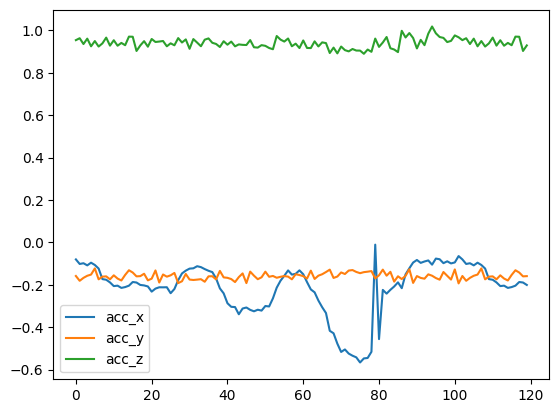

In [ ]:
# prompt: Using dataframe df: line plot of acc_x,acc_y,acc_z vs timestamp with matplotlib

import matplotlib.pyplot as plt

# Plot the data
plt.plot(df['timestamp'], df['acc_x'], label='acc_x')
plt.plot(df['timestamp'], df['acc_y'], label='acc_y')
plt.plot(df['timestamp'], df['acc_z'], label='acc_z')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
path2= 'https://raw.githubusercontent.com/QinHsiu/Driver-Behaviour-Identification/main/Original%20Data/Original%20Data/863293055538448-1625179321.0-BRAKE.csv'
df = pd.read_csv(path2)
df.rename(columns={'Unnamed: 0': 'timestamp'}, inplace=True)
df.head()

,timestamp,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
0,0,-0.136475,-0.148438,1.020752,0.366211,1.464844,-0.839233
1,1,-0.135742,-0.146729,1.020996,0.366211,1.480103,-0.839233
2,2,-0.134644,-0.150635,1.020874,0.366211,1.480103,-0.808716
3,3,-0.137573,-0.148804,1.020752,0.350952,1.480103,-0.808716
4,4,-0.136108,-0.147827,1.022095,0.350952,1.495361,-0.808716


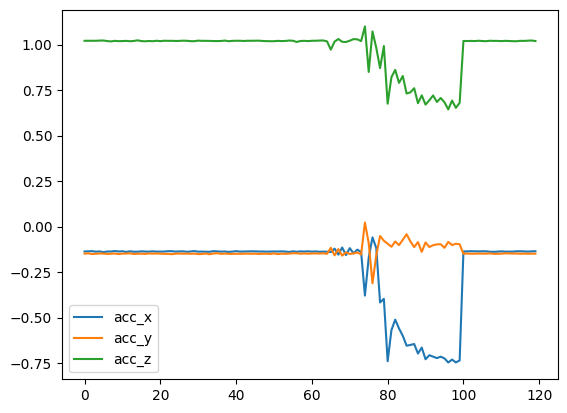

In [ ]:
# prompt: Using dataframe df: line plot of acc_x,acc_y,acc_z vs timestamp with matplotlib

import matplotlib.pyplot as plt

# Plot the data
plt.plot(df['timestamp'], df['acc_x'], label='acc_x')
plt.plot(df['timestamp'], df['acc_y'], label='acc_y')
plt.plot(df['timestamp'], df['acc_z'], label='acc_z')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
path3 = "https://raw.githubusercontent.com/petroniocandido/DriverBehaviorClassificationDatasets/main/Data/yuksel_2020/dataset.csv"
df = pd.read_csv(path3)
df.rename(columns={'Unnamed: 0': 'timestamp'}, inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   1114 non-null   int64  
 1   GyroX   1114 non-null   float64
 2   GyroY   1114 non-null   float64
 3   GyroZ   1114 non-null   float64
 4   AccX    1114 non-null   float64
 5   AccY    1114 non-null   float64
 6   AccZ    1114 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 61.0 KB


In [ ]:
df['Class'].value_counts()

Class
3    350
2    288
1    252
4    224
Name: count, dtype: int64

In [ ]:
# loading nazirkar_2021 data set
path4 ='https://raw.githubusercontent.com/petroniocandido/DriverBehaviorClassificationDatasets/main/Data/nazirkar_2021/dataset.csv'
df = pd.read_csv(path4)
df.columns = df.columns.str.lower()

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   accx    14249 non-null  float64
 1   accy    14249 non-null  float64
 2   accz    14249 non-null  float64
 3   gyrox   14249 non-null  float64
 4   gyroy   14249 non-null  float64
 5   gyroz   14249 non-null  float64
 6   class   14249 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 779.4 KB


,accx,accy,accz,gyrox,gyroy,gyroz,class
0,0.046402,-0.137178,-0.282934,-0.036306,-0.008226,-0.023416,0
1,-0.136978,0.365242,0.108889,0.035776,-0.009448,0.009570,0
2,-0.045355,-0.103340,-0.534985,-0.011871,-0.027774,0.003462,0
3,0.242089,0.072761,-0.350396,-0.017980,0.002769,-0.005091,0
4,-0.230234,0.011765,-0.494085,0.011342,0.003380,0.006516,0
